# Dataset: NYC taxi timings & weather report

Business Questions:
/change the questions into objectives
1)	Tool- How does the average travel duration affect by amount of precipitation? 
2)	Tool- How does the average travel distance affect by the amount of precipitation? 
3)	Tool- How is the trip duration affected by average temperatures? 
4)	Decision making- What is the ideal distance of travel to maximize the number of passengers per hour in rush hour? 
The decision will take its place while optimizing the number of taxis during the rush hours. The dision maker could be the general manager of the taxi station.

Measurable Target:
1. 

In [1]:
import pandas as pd
import numpy as np
import IPython.display as display
import matplotlib.pyplot as plt 
import datetime
import seaborn as sns 
%matplotlib inline 
from sklearn.model_selection import train_test_split   # This is to prepare the data for the model
from sklearn.tree import DecisionTreeClassifier 

In [2]:
df=pd.read_csv(r'NYC_taxi_trips.csv')

Let's see the data 

In [77]:
df.head()

,sample_ID,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,total_amount,trip_duration
0,4287015,VTS,2014-01-01 00:46:00,2014-01-01 01:21:00,1,14.08,-73.989462,40.720395,1,-73.885582,40.857895,CRD,43.5,57.70,00:35:00
1,11258964,CMT,2014-01-01 02:31:00,2014-01-01 02:58:00,1,6.10,-74.004526,40.741617,1,-73.972916,40.782535,CRD,23.0,24.00,00:27:00
2,3349190,VTS,2014-01-28 17:54:00,2014-01-28 17:57:00,1,0.82,-73.959163,40.771767,1,-73.952275,40.781150,CSH,4.5,6.00,00:03:00
3,13918361,VTS,2014-02-27 13:35:00,2014-02-27 13:56:00,4,2.99,-74.005203,40.720355,1,-73.981020,40.759027,CRD,15.0,18.50,00:21:00
4,2380163,VTS,2014-01-24 17:21:00,2014-01-24 17:33:00,1,1.75,-73.989990,40.755860,1,-74.005280,40.741110,CRD,10.5,15.45,00:12:00


In [48]:
df.dtypes

sample_ID                     int64
vendor_id                    object
pickup_datetime      datetime64[ns]
dropoff_datetime     datetime64[ns]
passenger_count               int64
trip_distance               float64
pickup_longitude            float64
pickup_latitude             float64
rate_code                     int64
dropoff_longitude           float64
dropoff_latitude            float64
payment_type                 object
fare_amount                 float64
total_amount                float64
dtype: object

In [50]:
## transforming time format and calculating trip duration
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format= '%d/%m/%Y %H:%M')
df['dropoff_datetime']= pd.to_datetime(df['dropoff_datetime'], format= '%d/%m/%Y %H:%M')
df['trip_duration'] =  df.dropoff_datetime -df.pickup_datetime


In [54]:
df.pickup_datetime.dt.weekday_name

0       Wednesday
1       Wednesday
2         Tuesday
3        Thursday
4          Friday
5          Monday
6          Sunday
7          Friday
8          Monday
9       Wednesday
10         Monday
11         Friday
12        Tuesday
13      Wednesday
14         Monday
15      Wednesday
16         Friday
17       Saturday
18         Sunday
19       Thursday
20      Wednesday
21       Thursday
22       Saturday
23         Friday
24         Friday
25        Tuesday
26        Tuesday
27       Thursday
28       Thursday
29       Saturday
          ...    
3156       Friday
3157    Wednesday
3158       Friday
3159     Saturday
3160      Tuesday
3161    Wednesday
3162     Saturday
3163     Thursday
3164      Tuesday
3165    Wednesday
3166     Saturday
3167       Friday
3168    Wednesday
3169      Tuesday
3170       Monday
3171       Friday
3172      Tuesday
3173       Friday
3174       Friday
3175       Sunday
3176       Friday
3177     Saturday
3178     Thursday
3179       Sunday
3180    We

<b>Changing the column names</b><br>
The data came from US- the unit of measurement is in inch\mile\F degree etc.

In [ ]:
df.rename(columns={'trip_duration':'trip_duration(min)','snow_depth':'snow_depth(inch)',
                       'avg_temp':'avg_temp(F)','distance':'distance(mile)'},inplace=True)

In [70]:
df.describe().round(2)

,sample_ID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,fare_amount,total_amount,trip_duration
count,3186.00,3186.00,3186.00,3186.00,3186.00,3186.00,3186.00,3186.00,3186.00,3186.00,3186
mean,7537165.08,1.68,2.74,-72.96,40.11,1.02,-72.82,40.03,11.76,14.25,0 days 00:12:04.538606
std,4333409.32,1.34,3.22,8.93,6.19,0.22,9.48,6.43,9.24,11.25,0 days 00:08:58.906029
min,10339.00,1.00,0.00,-180.00,-180.00,0.00,-180.00,-180.00,2.50,3.00,0 days 00:00:00
25%,3882098.50,1.00,1.00,-73.99,40.74,1.00,-73.99,40.73,6.50,7.80,0 days 00:06:00
50%,7555203.50,1.00,1.70,-73.98,40.75,1.00,-73.98,40.75,9.00,10.80,0 days 00:10:00
75%,11268305.00,2.00,3.08,-73.97,40.77,1.00,-73.96,40.77,13.50,16.00,0 days 00:16:00
max,14998525.00,6.00,29.88,0.00,40.85,5.00,0.00,40.90,88.50,110.27,0 days 01:33:00


make a df for the object features

Action: <br> 
1. Split the Day value out from the Date <br>
2. leave the times in the same format <br>

store_and_fwd_flag explanation- <br> 
This flag indicates whether the trip record was held in vehicle
memory before sending to the vendor, aka “store and forward,”
because the vehicle did not have a connection to the server

In [ ]:
obj_df['pickup_datetime'] = pd.to_datetime(obj_df['pickup_datetime'], format = '%Y/%m/%d')
obj_df['day'] = obj_df['pickup_datetime'].dt.day
df.insert(loc = 2, column = 'day', value = int, allow_duplicates = True)
df['day'] = obj_df['day']
df.head()

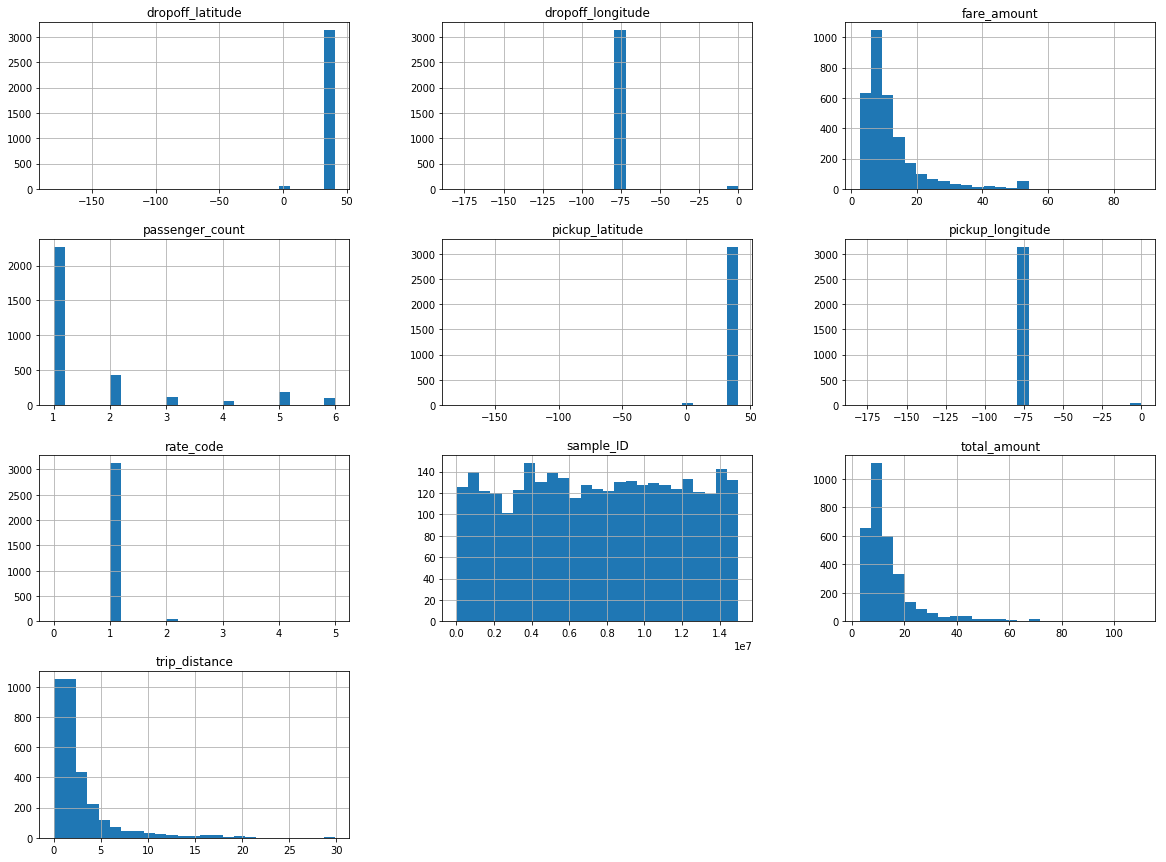

In [78]:
df.hist(bins = 25, figsize = (20,15))
plt.show()

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

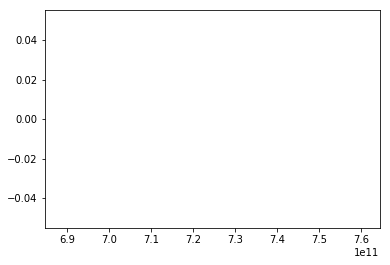

In [79]:
from scipy.stats import norm 
import seaborn as sns
sns.distplot(df["trip_duration(min)"], fit=norm)

Normal distribution with left border=0

In [ ]:
#spliting data trip duration
duration_norm_big = df[df["trip_duration(min)"] <= 20] 
duration_norm_small = df[df["trip_duration(min)"] >= 20] 
sns.distplot(duration_norm_big["trip_duration(min)"], fit=norm)
sns.distplot(duration_norm_small["trip_duration(min)"], fit=norm)

On the same variable we got 2 splits that give two normal curves

<b>Clip numbers of the avg_temp(F)</b><br>
clipping the left and right values- focusing on 30F-80F

In [ ]:
temptrature = np.clip(df['avg_temp(F)'], 30, 80 ) 
plt.hist(df['avg_temp(F)'], bins=30)
plt.hist(temptrature, bins=30, color='red', alpha = 0.5)
plt.show()

<b>Finding correlations using scatter plots</b>

In [ ]:
df.plot(kind="scatter", x="avg_temp(F)", y="trip_duration(min)", alpha=0.1)

In [ ]:
df.plot(kind="scatter", x="avg_temp(F)", y="distance(mile)", alpha=0.1)

In [ ]:
df.precipitate = pd.to_numeric(df['precipitate'], errors='coerce')
df.plot(kind="scatter", x="precipitate", y="trip_duration(min)", alpha=0.1)

In [ ]:
df.plot(kind="scatter", x="snow_fall", y="trip_duration(min)", alpha=0.1)

In [ ]:
df.plot(kind="scatter", x="snow_fall", y="distance(mile)", alpha=0.1)

In [ ]:
df.plot(kind="scatter", x="precipitate", y="distance(mile)", alpha=0.1)

In [ ]:
df.plot(kind="scatter", x="pickup_longitude", y="pickup_latitude", alpha=0.05)

In [ ]:
df.plot(kind="scatter", x="dropoff_longitude", y="dropoff_latitude", alpha=0.05)

In [ ]:
df['distance(mile)'].astype(float)
corr_matrix = df.corr()
corr_matrix["distance(mile)"].sort_values(ascending=False)

In [ ]:
df['distance(mile)'].astype(float)
corr_matrix = df.corr()
corr_matrix["distance(mile)"].sort_values(ascending=False)
corr_matrix
df['distance(mile)'].corr(df['trip_duration(min)'])

In [ ]:
sns.heatmap(corr_matrix)

In [ ]:
sns.heatmap(corr_matrix[(corr_matrix<1) & ((corr_matrix >= 0.3) | (corr_matrix <= -0.3)) ] )

In [ ]:
#Transform the data to matrix of X and y

# 1. Split between X the predictors and y the target
y = df['vendor_id']
X = df.drop('vendor_id', axis=1)

# 2. Turn from data frame to matrix: no indexes, number only
X = X.values  # X is a matrix of size 20 * 810
y = y.values  # y is a matrix of size 1 * 810, therefore it is a vector

# 3. Split X and y togather to train data set 80% and test data set 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify = y) 

In [ ]:
print( 'df type is: ', type(df), '  and X_train type is: ', type(X_train))

In [ ]:
# select a model
tree_class = DecisionTreeClassifier()

In [ ]:
tree_class.fit(X_train, y_train)

In [ ]:
#Model evaluation
tree_class.score(X=X_test, y=y_test) 

In [ ]:
tree_class.score(X=X_train, y=y_train) 

In [ ]:
#Predict / Deploy model
example = X_test[7:10,]
example

In [ ]:
predicted_y = tree_class.predict(X=example)
predicted_y

In [ ]:
y_test[7:10,]

## Heatmap Module 

In [ ]:
!pip install folium
import folium
from folium import plugins
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
## Pickup Data
nyc_map_pickup = folium.Map([40.7306,-73.935242], zoom_start=11)

for index, row in df.iterrows():
    folium.CircleMarker([row['pickup_latitude'], row['pickup_longitude']],
                        radius=1,
                        fill=True,
                        fill_color="blue", 
                        fill_opacity=0.005,
                       )#.add_to(nyc_map) if you want to add points/markers to the map - does not look well with heatmaps

In [ ]:
# convert to (n, 2) nd-array format for heatmap
pickupArr = df[['pickup_latitude', 'pickup_longitude']].as_matrix()

# plot heatmap
nyc_map_pickup.add_child(plugins.HeatMap(pickupArr, radius=15))


In [ ]:
## Dropoff Data
nyc_map_dropoff = folium.Map([40.7306,-73.935242], zoom_start=11)

for index, row in df.iterrows():
    folium.CircleMarker([row['dropoff_latitude'], row['dropoff_longitude']],
                        radius=1,
                        fill=True,
                        fill_color="blue", 
                        fill_opacity=0.005,
                       )#.add_to(nyc_map) if you want to add points/markers to the map - does not look well with heatmaps

In [ ]:
dropoffArr = df[['dropoff_latitude', 'dropoff_longitude']].as_matrix()

# plot heatmap
nyc_map_dropoff.add_child(plugins.HeatMap(dropoffArr, radius=15))